In [2]:
import numpy as np
import networkx as nx

class Counter(dict):
    largest_non_zero = 0
    def increment(self, item, delta = 1):
        new_val = delta + self.pop(item, 0)
        if new_val > 0:
            self[item] = new_val
            if (item != 0) and (new_val > self.largest_non_zero):
                self.largest_non_zero = new_val

def y(x):
    return 2**x

def find_tranformation_matrix(b, E, N, Tmax):

    M = np.shape(E)[0]
    n = np.random.poisson(lam = Tmax*(N+b*M))
    times = np.sort(np.random.uniform(0, Tmax, n))
    R = np.zeros(n, dtype = int)
    X = [2**i for i in range(N)][::-1]

    pmixing = False

    counts = Counter()
    for element in X:
        counts.increment(element, 1)

    for t in range(n):
        
        if np.random.random() < N/(N + b*M):

            i = np.random.randint(N)
                
            counts.increment(X[i], -1)

            X[i] = 0

            counts.increment(0, 1)

        else:

            i,j = E[np.random.randint(M)]
                    
            new = X[i] | X[j]
            counts.increment(X[i], -1)
            counts.increment(X[j], -1)
            counts.increment(new, 2)
            X[i] = X[j] = new
                
        R[t] = len(counts) - (0 in counts)

        if (pmixing == False) and (R[t] == 1):
            pmixing = times[t]
        
        if pmixing != False:
            if (R[t] == 0) or (times[t] > 4 * pmixing):
                times = times[:t]
                R = R[:t]
                break

    return times, R, counts.largest_non_zero, pmixing


N = 2000
d = 3
G = nx.random_regular_graph(d, N)
E = list(G.edges)
Tmax = 1e3
num_trials = 2

b = np.linspace(0.002, 2, 25)
s1starvar = []
s1starav = []
pmixinglist = []
for i in range(len(b)):
    s1 = []
    pm = []
    for j in range(num_trials):
        times, R, spatial, pmixing = find_tranformation_matrix(b[i], E, N, Tmax)
        s1.append(spatial)
        pm.append(pmixing)
    s1starav.append(np.mean(s1))
    s1starvar.append(np.var(s1))
    pmixinglist.append(np.mean(pm))
    print(f"b = {b[i]} done, pmixing = {pmixinglist[-1]}, s1star = {s1starav[-1]}, var = {s1starvar[-1]}")
print(s1starav)
print(s1starvar)
print(pmixinglist)

b = 0.002 done, pmixing = 7.430434735903379, s1star = 2.0, var = 0.0
b = 0.08525 done, pmixing = 9.020312080209091, s1star = 5.0, var = 0.0
b = 0.1685 done, pmixing = 10.821725214508637, s1star = 6.5, var = 0.25
b = 0.25175000000000003 done, pmixing = 11.953274249042801, s1star = 8.0, var = 0.0
b = 0.335 done, pmixing = 17.230706192770896, s1star = 12.0, var = 1.0
b = 0.41825 done, pmixing = 31.19508814777638, s1star = 20.5, var = 6.25
b = 0.5015000000000001 done, pmixing = 39.71587102521934, s1star = 25.5, var = 30.25
b = 0.58475 done, pmixing = 183.32763303131065, s1star = 387.5, var = 42.25
b = 0.668 done, pmixing = 84.76846758450162, s1star = 705.5, var = 240.25
b = 0.7512500000000001 done, pmixing = 61.72943544478399, s1star = 933.5, var = 0.25
b = 0.8345 done, pmixing = 44.57396071820979, s1star = 1074.0, var = 36.0
b = 0.9177500000000001 done, pmixing = 36.00915591130399, s1star = 1196.5, var = 72.25
b = 1.0010000000000001 done, pmixing = 28.852858069677744, s1star = 1286.0, var

Through initial experimentation, it appears that for this network of size 2000 with d = 3, the pseudo mixing time diverges at around 0.58475

In [26]:
import numpy as np
import networkx as nx

class Counter(dict):
    largest_non_zero = 0
    def increment(self, item, delta = 1):
        new_val = delta + self.pop(item, 0)
        if new_val > 0:
            self[item] = new_val
            if (item != 0) and (new_val > self.largest_non_zero):
                self.largest_non_zero = new_val

def y(x):
    return 2**x

def find_tranformation_matrix(b, E, N, Tmax):

    M = np.shape(E)[0]
    n = np.random.poisson(lam = Tmax*(N+b*M))
    times = np.sort(np.random.uniform(0, Tmax, n))
    R = np.zeros(n, dtype = int)
    X = [2**i for i in range(N)][::-1]
    Espaitialmax = Espatial = np.ones(N)
    

    pmixing = False

    counts = Counter()
    for element in X:
        counts.increment(element, 1)

    for t in range(n):
        
        if np.random.random() < N/(N + b*M):

            i = np.random.randint(N)
            
            counts.increment(X[i], -1)

            X[i] = Espatial[i] = 0

            counts.increment(0, 1)

        else:

            i,j = E[np.random.randint(M)]
                    
            new = X[i] | X[j]
            counts.increment(X[i], -1)
            counts.increment(X[j], -1)
            counts.increment(new, 2)
            X[i] = X[j] = new
            Espatial[i] = Espatial[j] = new.bit_count()
            if new.bit_count() > Espaitialmax[i]:
                Espaitialmax[i] = new.bit_count()
            if new.bit_count() > Espaitialmax[j]:
                Espaitialmax[j] = new.bit_count()

        R[t] = len(counts) - (0 in counts)

        if (pmixing == False) and (R[t] == 1):
            pmixing = times[t]
            ## Average of the bitcounts of the rows AT C1 (not max over time!)
            e = np.average(Espatial)
        
        if pmixing != False:
            if (R[t] == 0) or (times[t] > 3 * pmixing):
                times = times[:t]
                R = R[:t]
                ## Average of the bitcounts of the rows which are maxed over TIME 
                emax = np.average(Espaitialmax)
                break

    return times, R, counts.largest_non_zero, pmixing, e, emax


N = 2000
d = 3
G = nx.random_regular_graph(d, N)
E = list(G.edges)
Tmax = 1e4
num_trials = 25

b = np.linspace(0.4678, 0.7017, 25)
s1starvar = []
s1starav = []
pmixinglist = []
es = []
emaxs = []
for i in range(len(b)):
    s1 = []
    pm = []
    elist = []
    emaxlist = []
    for j in range(num_trials):
        times, R, spatial, pmixing, e, emax = find_tranformation_matrix(b[i], E, N, Tmax)
        s1.append(spatial)
        pm.append(pmixing)
        elist.append(e)
        emaxlist.append(emax)
    s1starav.append(np.mean(s1))
    s1starvar.append(np.var(s1))
    pmixinglist.append(np.mean(pm))
    es.append(np.mean(elist))
    emaxs.append(np.mean(emaxlist))
    print(f"b = {b[i]} done, pmixing = {pmixinglist[-1]}, s1star = {s1starav[-1]}, var = {s1starvar[-1]}")
    

print(s1starav)
print(s1starvar)
print(pmixinglist)
print(es)
print(emaxs)

b = 0.4678 done, pmixing = 34.80373541288247, s1star = 20.76, var = 22.982400000000005
b = 0.47754583333333334 done, pmixing = 41.316649315350595, s1star = 25.88, var = 37.3856
b = 0.4872916666666667 done, pmixing = 44.98762658601562, s1star = 31.08, var = 109.75359999999999
b = 0.4970375 done, pmixing = 51.96828365172132, s1star = 29.96, var = 50.278400000000005
b = 0.5067833333333334 done, pmixing = 54.65460370580977, s1star = 35.56, var = 134.24640000000002
b = 0.5165291666666667 done, pmixing = 64.78886709486683, s1star = 38.36, var = 84.2304
b = 0.526275 done, pmixing = 80.64199528392474, s1star = 52.2, var = 345.68000000000006
b = 0.5360208333333334 done, pmixing = 94.87429244091814, s1star = 62.2, var = 383.11999999999995
b = 0.5457666666666666 done, pmixing = 111.88877863199382, s1star = 106.4, var = 2817.04
b = 0.5555125 done, pmixing = 155.42481316716666, s1star = 149.28, var = 3783.5615999999995
b = 0.5652583333333333 done, pmixing = 218.16664358759968, s1star = 256.72, var 

Bc = 0.5652583333333333 

In [2]:
import numpy as np
pmixing = [34.80373541288247, 41.316649315350595, 44.98762658601562, 51.96828365172132, 54.65460370580977, 64.78886709486683, 80.64199528392474, 94.87429244091814, 111.88877863199382, 155.42481316716666, 218.16664358759968, 211.46081357162026, 192.8231282769013, 175.93377743095382, 149.44641008340676, 129.15423106423307, 123.23316591861335, 121.22402331745587, 104.19144085284668, 94.10309435243667, 93.55983285666272, 86.90346781252956, 83.86658358237847, 75.45663563975084, 72.03029171522003]
es = [0.013840000000000003, 0.012960000000000001, 0.04184, 0.039599999999999996, 0.1026, 0.07816000000000001, 0.18464, 0.17412, 0.52902, 2.20236, 6.8262599999999996, 18.18128, 27.444879999999998, 43.633700000000005, 54.575140000000005, 68.73993999999999, 88.37336, 108.62562, 121.91149999999998, 135.45364, 153.9805, 175.39304, 196.83392, 218.85202, 232.44943999999998]
emaxs = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00738, 0.17737999999999998, 1.5954, 5.21736, 18.78454, 27.907719999999998, 45.615100000000005, 52.12295999999999, 69.67450000000001, 86.93042000000001, 109.3084, 122.64756, 141.12181999999999, 156.51726, 180.72546, 197.64262000000002, 216.57698, 230.55978]
b = np.linspace(0.4678, 0.7017, 25)

In [3]:
Bc = 0.5652583333333333 
b = np.linspace(0.4678, 0.7017, 25)
modelb = np.abs(b - Bc)

counter = 0
for i, j in zip(b, modelb):
    if i != Bc:
        counter += 1
    else:
        bnew = np.delete(b, counter)
        modelb = np.delete(modelb, counter)

print(len(bnew))
print(len(modelb))

print(len(b))
print(len(pmixing))
temporalmodel = modelb**(-1)


print(temporalmodel)




24
24
25
25
[ 10.26079521  11.40088357  12.82599401  14.65827887  17.10132535
  20.52159042  25.65198803  34.20265071  51.30397606 102.60795212
 102.60795212  51.30397606  34.20265071  25.65198803  20.52159042
  17.10132535  14.65827887  12.82599401  11.40088357  10.26079521
   9.32799565   8.55066268   7.89291939   7.32913944]


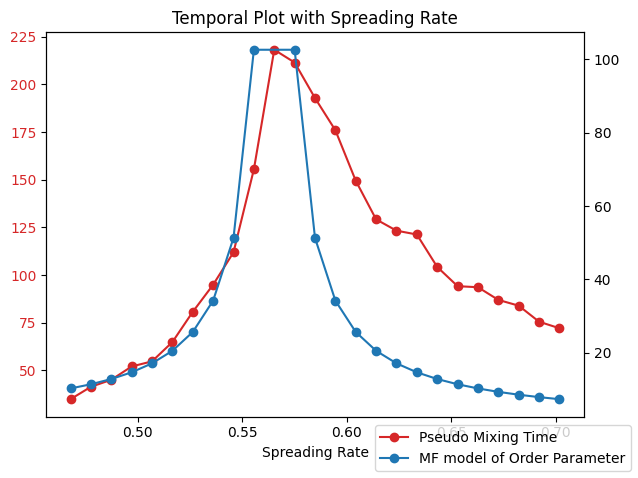

In [4]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Spreading Rate')
ax1.set_ylabel('Time', color=color)
ax1.plot(b, pmixing, color=color, marker = 'o', label= 'Pseudo Mixing Time')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
color = 'tab:blue'
ax2.plot(bnew, temporalmodel, color=color, marker = 'o', label= 'MF model of Order Parameter')
ax1.set_ylabel('', color=color)


fig.legend(loc = 'lower right')
plt.title('Temporal Plot with Spreading Rate')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


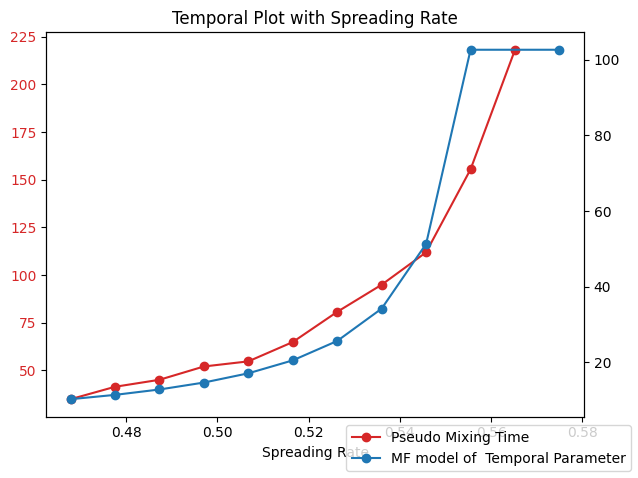

In [19]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Spreading Rate')
ax1.set_ylabel('Time', color=color)
ax1.plot(b[:11], pmixing[:11], color=color, marker = 'o', label= 'Pseudo Mixing Time')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
color = 'tab:blue'
ax2.plot(bnew[:11], temporalmodel[:11], color=color, marker = 'o', label= 'MF model of  Temporal Parameter')
ax1.set_ylabel('', color=color)

fig.legend(loc = 'lower right')
plt.title('Temporal Plot with Spreading Rate')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


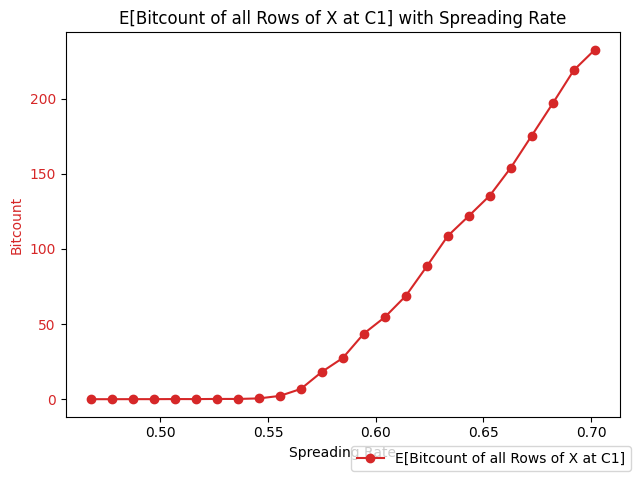

In [38]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Spreading Rate')
ax1.set_ylabel('Bitcount', color=color)
ax1.plot(b, es, color=color, marker = 'o', label= 'E[Bitcount of all Rows of X at C1]')
ax1.tick_params(axis='y', labelcolor=color)

# ax2 = ax1.twinx()
# color = 'tab:blue'
# color = 'tab:blue'
# ax2.plot(b, modelb, color=color, marker = 'o', label= 'IMF model of Order Parameter')
# ax1.set_ylabel('', color=color)


fig.legend(loc = 'lower right')
plt.title('E[Bitcount of all Rows of X at C1] with Spreading Rate')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


Shift b - Bc


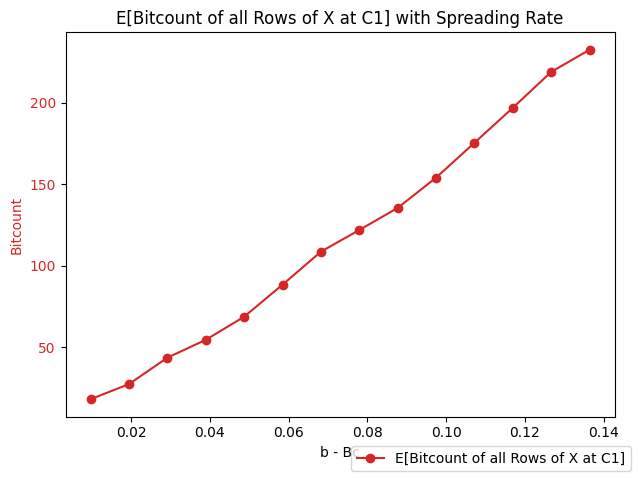

In [63]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots()
modelbnew = np.abs(b - Bc)
color = 'tab:red'
ax1.set_xlabel('b - Bc')
ax1.set_ylabel('Bitcount', color=color)
ax1.plot(modelbnew[11:], es[11:], color=color, marker = 'o', label= 'E[Bitcount of all Rows of X at C1]')
ax1.tick_params(axis='y', labelcolor=color)


fig.legend(loc = 'lower right')
plt.title('E[Bitcount of all Rows of X at C1] with Spreading Rate')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


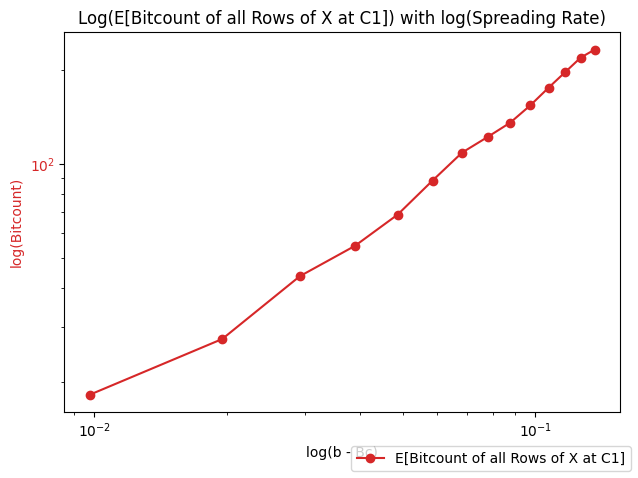

In [64]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots()
modelbnew = np.abs(b - Bc)
color = 'tab:red'
ax1.set_xlabel('log(b - Bc)')
ax1.set_ylabel('log(Bitcount)', color=color)
ax1.plot(modelbnew[11:], es[11:], color=color, marker = 'o', label= 'E[Bitcount of all Rows of X at C1]')
ax1.tick_params(axis='y', labelcolor=color)

plt.yscale('log')
plt.xscale('log')
fig.legend(loc = 'lower right')
plt.title('Log(E[Bitcount of all Rows of X at C1]) with log(Spreading Rate)')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


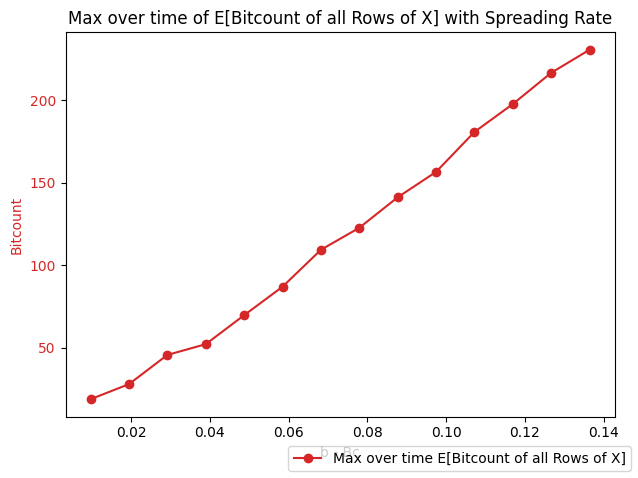

In [66]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('b - Bc')
ax1.set_ylabel('Bitcount', color=color)
ax1.plot(modelbnew[11:], emaxs[11:], color=color, marker = 'o', label= 'Max over time E[Bitcount of all Rows of X]')
ax1.tick_params(axis='y', labelcolor=color)


fig.legend(loc = 'lower right')
plt.title('Max over time of E[Bitcount of all Rows of X] with Spreading Rate')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


Find the slope of this line through linear regression!


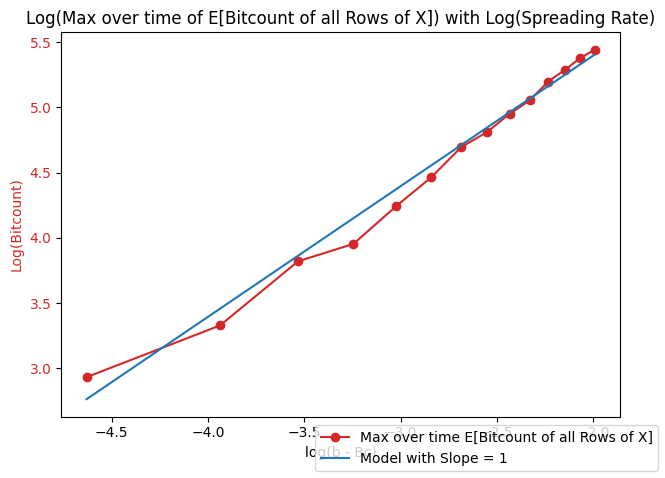

In [77]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('log(b - Bc)')
ax1.set_ylabel('Log(Bitcount)', color=color)
ax1.plot(np.log(modelbnew[11:]), np.log(emaxs[11:]), color=color, marker = 'o', label= 'Max over time E[Bitcount of all Rows of X]')
ax1.tick_params(axis='y', labelcolor=color)

x = np.log(modelbnew[11:])
y = x + 7.39518094640019

ax1.plot(x, y, color = 'tab:blue', label = 'Model with Slope = 1')

fig.legend(loc = 'lower right')
plt.title('Log(Max over time of E[Bitcount of all Rows of X]) with Log(Spreading Rate)')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


In [73]:
x = np.log(modelbnew[11:])
y = np.log(emaxs[11:])

# Use np.polyfit to fit a line to the data
coefficients = np.polyfit(x, y, 1)

# The slope of the line is the first element of the coefficients
slope = coefficients[0]
print(slope)
print(coefficients[1])

1.0085274155491402
7.39518094640019


In [74]:
x = np.log(modelbnew[11:])
y = np.log(es[11:])

# Use np.polyfit to fit a line to the data
coefficients = np.polyfit(x, y, 1)

# The slope of the line is the first element of the coefficients
slope = coefficients[0]
print(slope)
print(coefficients[1])

1.0160735974961497
7.40726968829032


In [11]:
pmixing = [34.80373541288247, 41.316649315350595, 44.98762658601562, 51.96828365172132, 54.65460370580977, 64.78886709486683, 80.64199528392474, 94.87429244091814, 111.88877863199382, 155.42481316716666, 218.16664358759968, 211.46081357162026, 192.8231282769013, 175.93377743095382, 149.44641008340676, 129.15423106423307, 123.23316591861335, 121.22402331745587, 104.19144085284668, 94.10309435243667, 93.55983285666272, 86.90346781252956, 83.86658358237847, 75.45663563975084, 72.03029171522003]
es = [0.013840000000000003, 0.012960000000000001, 0.04184, 0.039599999999999996, 0.1026, 0.07816000000000001, 0.18464, 0.17412, 0.52902, 2.20236, 6.8262599999999996, 18.18128, 27.444879999999998, 43.633700000000005, 54.575140000000005, 68.73993999999999, 88.37336, 108.62562, 121.91149999999998, 135.45364, 153.9805, 175.39304, 196.83392, 218.85202, 232.44943999999998]
emaxs = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00738, 0.17737999999999998, 1.5954, 5.21736, 18.78454, 27.907719999999998, 45.615100000000005, 52.12295999999999, 69.67450000000001, 86.93042000000001, 109.3084, 122.64756, 141.12181999999999, 156.51726, 180.72546, 197.64262000000002, 216.57698, 230.55978]
b = np.linspace(0.4678, 0.7017, 25)

In [12]:
exp = []
for spatial, temporal in zip(emaxs, pmixing):
    exp.append(spatial/temporal)

print(exp)

Bc = 0.5652583333333333 
b = np.linspace(0.4678, 0.7017, 25)
modelb = np.abs(b - Bc)


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.778714138601675e-05, 0.0015853243030153107, 0.01026477026087252, 0.023914563263219897, 0.08883225067909715, 0.14473222299310204, 0.2592742602704697, 0.34877358359367694, 0.539467421437772, 0.7054141582097413, 0.9017057593753361, 1.1771366150240647, 1.4996512173283898, 1.6729108552362473, 2.0796116029554277, 2.3566313489551454, 2.870217816680743, 3.200872501135277]


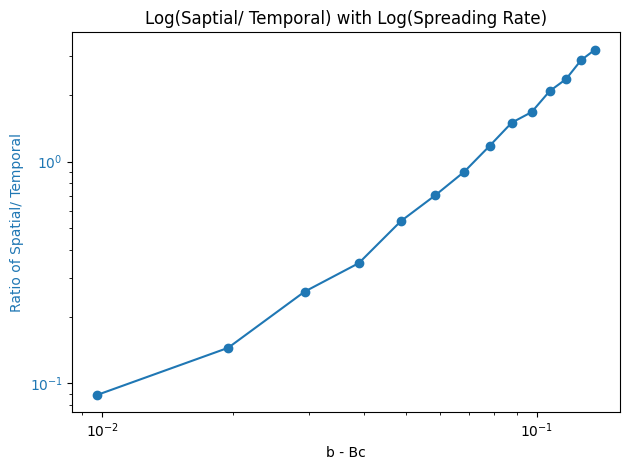

In [16]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('b - Bc')
ax1.set_ylabel('Ratio of Spatial/ Temporal', color=color)
ax1.plot(modelb[11:], exp[11:], color=color, marker = 'o')
ax1.tick_params(axis='y', labelcolor=color)

plt.yscale('log')
plt.xscale('log')
# fig.legend(loc = 'lower right')
plt.title('Log(Saptial/ Temporal) with Log(Spreading Rate)')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


In [14]:
x = np.log(modelb[11:])
y = np.log(exp[11:])

# Use np.polyfit to fit a line to the data
coefficients = np.polyfit(x, y, 1)

# The slope of the line is the first element of the coefficients
slope = coefficients[0]
print(slope)

1.4449234660255432
